In [1]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset

## Load one image and visualize it

In [2]:
image_path = "test_images/image_000.npy"
plt.rcParams["savefig.bbox"] = 'tight'
image = np.load(image_path)

In [3]:
# Normalize the image to the range [0, 1] for proper visualization
image = (image - np.min(image)) / (np.max(image) - np.min(image))

# Extract the RGB channels
image = image[0:3, :, :]

# Transpose the image array to have shape H x W x C for proper color image format
image = np.transpose(image, (1,2,0))

In [4]:
# Display the RGB image
plt.imshow(image)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


: 

: 

## Load one patch

In [82]:
image_path = "C:/Users/damian.garrell/Documents/CaseStudy2Repo/da2/patches/train/patch_02_000_00000.npy"
plt.rcParams["savefig.bbox"] = 'tight'
image_set = [np.load(image_path, allow_pickle = True)]

In [83]:
image = image_set[0][0]

# Normalize the image to the range [0, 1] for proper visualization
image = (image - np.min(image)) / (np.max(image) - np.min(image))

# Extract the RGB channels for visualization
image = image[0:3, :, :]

# Transpose the image array to have shape H x W x C for proper color image format
image = np.transpose(image, (1,2,0))

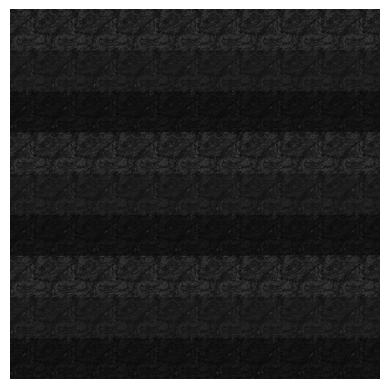

In [84]:
# Display the RGB image
plt.imshow(image)
plt.axis('off')
plt.show()

## Count min and max values for veg and moisture channels for each input image

In [6]:
def ndigit(n, x):
    x = str(x)
    while(len(x) < n):
        x = "0" + x
    return x

In [17]:
def load_data(res, files = 20):
    path = ["02", "train"]
    res = int((res-1)/2)
    nan_values = 0
    for p in path:
        for f in range(files):
            image = np.load(f"images_{p}/images/image_{ndigit(3, f)}.npy")

            image = np.reshape(image, (1024,1024,10))
            
            nan_values_before = (np.count_nonzero(np.isnan(image)))
            
            channel8 = image[:, :, 6]
            channel4 = image[:, :, 2]
            channel8a = image[:, :, 7]
            channel11 = image[:, :, 8]

            min_channel8 = np.inf
            min_channel4 = np.inf
            min_channel8a = np.inf
            min_channel11 = np.inf

            for l in range(len(channel8)):
                for h in range(len(channel8)):
                    if channel8[l][h] < min_channel8:
                        min_channel8 = channel8[l][h]
                    if channel4[l][h] < min_channel4:
                        min_channel4 = channel4[l][h]
                    if channel8a[l][h] < min_channel8a:
                        min_channel8a = channel8a[l][h]
                    if channel11[l][h] < min_channel11:
                        min_channel11 = channel11[l][h]

            print(f"image_{p}_{f} min values: channel 8a: {min_channel8}, channel 4: {min_channel4}, channel 8a: {min_channel8a}, channel 11: {min_channel11}")

In [18]:
load_data(15, 20)

image_02_0 min values: channel 8a: 57, channel 4: 63, channel 8a: 63, channel 11: 63
image_02_1 min values: channel 8a: 66, channel 4: 66, channel 8a: 66, channel 11: 79
image_02_2 min values: channel 8a: 131, channel 4: 126, channel 8a: 130, channel 11: 121
image_02_3 min values: channel 8a: 80, channel 4: 85, channel 8a: 91, channel 11: 71
image_02_4 min values: channel 8a: 18, channel 4: 18, channel 8a: 18, channel 11: 19
image_02_5 min values: channel 8a: 41, channel 4: 41, channel 8a: 42, channel 11: 42
image_02_6 min values: channel 8a: 148, channel 4: 134, channel 8a: 129, channel 11: 144
image_02_7 min values: channel 8a: 23, channel 4: 38, channel 8a: 20, channel 11: 34
image_02_8 min values: channel 8a: 38, channel 4: 45, channel 8a: 45, channel 11: 35
image_02_9 min values: channel 8a: 48, channel 4: 48, channel 8a: 48, channel 11: 48
image_02_10 min values: channel 8a: 109, channel 4: 109, channel 8a: 109, channel 11: 109
image_02_11 min values: channel 8a: 77, channel 4: 7